   <h1> ABOUT COVID-19 </h1>
<img src="https://ong.ohio.gov/stories/covid19/images/logos/covid-19.png" width="25%"/>
<img src="https://th.bing.com/th/id/OIP.pfqs4_2jELtzZn6ZSS1T8QHaHZ?o=6&pid=Api&rs=1" width="25%"/>

<div class="alert alert-block alert-danger">
<b>important note : </b> recovered data set did not update after 12/12/20. So the program ends in 12/12/20 (except animations). but you can manually run the program for dates after 12/12/20 by setting "limited = False" in cell no. 16
</div>


# before start

- ## what is C0VID-19?
> Coronaviruses are a large group of viruses that are common among animals. In rare cases, they are what scientists call zoonotic, meaning they can be transmitted from animals to humans, according to the US Centers for Disease Control and Prevention. more information __[*here.*](https://www.cnn.com/2020/01/20/health/what-is-coronavirus-explained/index.html)__

- ## why is it called COVID-19? 

> **COVID-19** is the name for the `disease` in humans caused by the new virus, says Dr. Bhuyan. (And that's short for coronavirus disease 2019, the year it was first identified, she adds.) more information __[*here.*](https://www.womenshealthmag.com/health/a31704399/why-is-it-called-coronavirus/)__

 ## importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.display import display, HTML

plt.style.use('ggplot')

## downloading data sets

In [2]:
recoverd_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv'
confirmed_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
deaths_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'

#also this url is a narrow version of all data sets : 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'

recoverd_df = pd.read_csv(recoverd_url)
confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)

## getting all data sets ready - step by step

In [3]:
c_df = confirmed_df.copy()
r_df = recoverd_df.copy()
d_df = deaths_df.copy()

In [4]:
path = 'https://raw.githubusercontent.com/ThisIsMahdiZare/about-covid19/main/data/Population.csv'
population_df = pd.read_csv(path)
population_df.index = population_df['Country/Region']
population_df = population_df.drop(population_df.columns[0], axis=1)

In [5]:
c_df = c_df.drop(c_df.columns[[0, 2, 3]], axis=1)
r_df = r_df.drop(r_df.columns[[0, 2, 3]], axis=1)
d_df = d_df.drop(d_df.columns[[0, 2, 3]], axis=1)

In [6]:
c_df = c_df.groupby('Country/Region').sum()
r_df = r_df.groupby('Country/Region').sum()
d_df = d_df.groupby('Country/Region').sum()

In [7]:
c_df = c_df.transpose()
r_df = r_df.transpose()
d_df = d_df.transpose()

In [8]:
del c_df['Diamond Princess']
del r_df['Diamond Princess']
del d_df['Diamond Princess']

In [9]:
temp_df = pd.DataFrame(index=c_df.index.to_list(),
                       columns=c_df.columns.to_list())
for day in temp_df.index:
    temp1 = pd.Series(c_df.loc[day]).div(population_df['Population'])
    temp_df.at[day, :] = temp1
temp_df = temp_df.apply(pd.to_numeric)

## about data sets

In [10]:
c_df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
12/26/20,50886,55755,97857,7806,17149,155,1578267,157349,28308,350484,...,2262735,16218,76666,1,111951,1440,131904,2092,19671,12963
12/27/20,51039,56254,98249,7821,17240,155,1583297,157834,28337,351892,...,2295228,16728,76751,1,112316,1441,133093,2094,19834,13077
12/28/20,51280,56572,98631,7875,17296,158,1590513,157948,28349,353484,...,2336688,17306,76832,1,112636,1451,134310,2096,19943,13148
12/29/20,51350,57146,98988,7919,17371,158,1602163,158296,28381,355352,...,2389963,17962,76907,1,112861,1454,135459,2096,20177,13325
12/30/20,51405,57727,99311,7983,17433,158,1613928,158878,28405,357902,...,2440202,18480,76985,1,113121,1456,136736,2097,20462,13625


In [11]:
r_df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
12/26/20,40784,31181,65505,7252,9976,146,1402227,138669,25730,320753,...,4910,10847,74291,1,106105,1303,108118,1384,18200,10519
12/27/20,41096,31565,65862,7288,10354,146,1407926,139113,25733,323002,...,5093,11366,74291,1,106453,1303,109377,1384,18210,10593
12/28/20,41441,32122,66214,7318,10354,147,1414680,139675,25748,326768,...,5102,11966,74439,1,106737,1303,110927,1384,18296,10705
12/29/20,41543,32700,66550,7360,10627,147,1420885,140942,25754,328974,...,5294,12506,74626,1,106958,1319,113082,1387,18380,11067
12/30/20,41612,33185,66855,7384,10859,148,1426676,141844,25761,330990,...,5414,12996,74789,1,107203,1323,115127,1392,18530,11154


In [12]:
d_df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
12/26/20,2149,1143,2722,83,399,5,42501,2752,908,5843,...,70513,147,612,0,1013,35,1281,606,382,341
12/27/20,2160,1153,2728,83,399,5,42650,2768,909,5881,...,70860,158,613,0,1014,35,1309,607,383,349
12/28/20,2174,1164,2737,83,403,5,42868,2775,909,5931,...,71217,160,613,0,1018,35,1332,607,384,354
12/29/20,2179,1170,2745,84,403,5,43018,2797,909,6059,...,71675,168,613,0,1021,35,1351,610,385,359
12/30/20,2181,1174,2751,84,405,5,43163,2807,909,6149,...,72657,174,614,0,1025,35,1371,610,386,360


In [13]:
data_sets = [c_df, r_df, d_df]
print('technical information about data sets :\n')
for data in data_sets:
    print(data.info(), '\n\n\n')

technical information about data sets :

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1/22/20 to 12/30/20
Columns: 190 entries, Afghanistan to Zimbabwe
dtypes: int64(190)
memory usage: 523.3+ KB
None 



<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1/22/20 to 12/30/20
Columns: 190 entries, Afghanistan to Zimbabwe
dtypes: int64(190)
memory usage: 523.3+ KB
None 



<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1/22/20 to 12/30/20
Columns: 190 entries, Afghanistan to Zimbabwe
dtypes: int64(190)
memory usage: 523.3+ KB
None 





In [14]:
print(f'list of countries :\n\n {c_df.columns.tolist()}')

list of countries :

 ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indon

In [15]:
print('start day : {}\nlast date : {}\n\nfirst country : {}\nlast country : {}\n\nnumer of dates : {}\nnumer of countries : {}'.format(
    c_df.index[0], '12/12/20', c_df.columns[0], c_df.columns[-1], c_df.shape[0], c_df.shape[1]))                      

start day : 1/22/20
last date : 12/12/20

first country : Afghanistan
last country : Zimbabwe

numer of dates : 344
numer of countries : 190


## numeric reports

### global report

In [16]:
def convert_today_date(limited = True):
    
    if limited:
        return '12/12/20'

    today = datetime.datetime.today()
    today = today - datetime.timedelta(days=1)
    return '{}/{}/{}'.format(today.month, today.day, str(today.year)[:-2])
    


def convert_yesterday_date(limited=True):

    if limited:
        return '12/11/20'
    
    format = "%m/%d/%Y"
    today = datetime.datetime.today()
    yesterday = today - datetime.timedelta(days=2)
    return '{}/{}/{}'.format(yesterday.month, yesterday.day, str(yesterday.year)[:-2])


def country_numeric_report(country='US'):
    
    date1 = convert_today_date()
    date2 = convert_yesterday_date()

    print(f'covid-19 summary report for {country}.\n\n    date : {date1}\n\n\ntotal cases : {c_df.loc[date1,country].sum()}\nnew cases : {c_df.loc[date1,country].sum() - c_df.loc[date2,country].sum()}\n\ntotal recoverd : {r_df.loc[date1,country].sum()}\nnew recovered : {r_df.loc[date1,country].sum() - r_df.loc[date2,country].sum()}\ntotal recovered to total cases ratio : {r_df.loc[date1,country].sum() / c_df.loc[date1,country].sum()}\n\ntotal deaths : {d_df.loc[date1,country].sum()}\nnew deaths : {d_df.loc[date1,country].sum() - d_df.loc[date2,country].sum()}\ntotal deaths to total cases ratio : {d_df.loc[date1,country].sum()/c_df.loc[date1,country].sum()}\n\ntotal deaths to total recovered ratio : {d_df.loc[date1,country].sum()/r_df.loc[date1,country].sum()}')

In [17]:
print(f'Global summary report.\ndate : {convert_today_date()}\n\ntotal cases : {c_df.loc[convert_today_date()].sum()}\nnew cases : {c_df.loc[convert_today_date()].sum() - c_df.loc[convert_yesterday_date()].sum()}\n\ntotal recoverd : {r_df.loc[convert_today_date()].sum()}\nnew recovered : {r_df.loc[convert_today_date()].sum() - r_df.loc[convert_yesterday_date()].sum()}\n\ntotal deaths : {d_df.loc[convert_today_date()].sum()}\nnew deaths : {d_df.loc[convert_today_date()].sum() - d_df.loc[convert_yesterday_date()].sum()}')

Global summary report.
date : 12/12/20

total cases : 71796366
new cases : 623004

total recoverd : 46926925
new recovered : 1507012

total deaths : 1605090
new deaths : 10225


In [18]:
country_numeric_report('Italy')

covid-19 summary report for Italy.

    date : 12/12/20


total cases : 1825775
new cases : 19902

total recoverd : 1076891
new recovered : 24728
total recovered to total cases ratio : 0.5898267858854459

total deaths : 64036
new deaths : 649
total deaths to total cases ratio : 0.03507332502635867

total deaths to total recovered ratio : 0.05946377117089845


In [19]:
country_numeric_report('Iran')

covid-19 summary report for Iran.

    date : 12/12/20


total cases : 1100818
new cases : 8411

total recoverd : 800853
new recovered : 13000
total recovered to total cases ratio : 0.7275071810235662

total deaths : 51949
new deaths : 222
total deaths to total cases ratio : 0.047191270491579895

total deaths to total recovered ratio : 0.06486708547011749


In [20]:
country_numeric_report('Israel')

covid-19 summary report for Israel.

    date : 12/12/20


total cases : 355786
new cases : 2517

total recoverd : 335243
new recovered : 1343
total recovered to total cases ratio : 0.9422602350851355

total deaths : 2983
new deaths : 14
total deaths to total cases ratio : 0.008384253455729006

total deaths to total recovered ratio : 0.008898023224944294


In [21]:
country_numeric_report('Australia')

covid-19 summary report for Australia.

    date : 12/12/20


total cases : 28030
new cases : 5

total recoverd : 25675
new recovered : 4
total recovered to total cases ratio : 0.9159828754905458

total deaths : 908
new deaths : 0
total deaths to total cases ratio : 0.03239386371744559

total deaths to total recovered ratio : 0.035365141187926


In [22]:
country_numeric_report('US')

covid-19 summary report for US.

    date : 12/12/20


total cases : 16152668
new cases : 219248

total recoverd : 6246605
new recovered : 111291
total recovered to total cases ratio : 0.38672280022099137

total deaths : 297904
new deaths : 2354
total deaths to total cases ratio : 0.018443021301496446

total deaths to total recovered ratio : 0.04769054550431794


## bar charts

### functions

#### description of some effective parameters listed as below :

   - **single bar charts**
       > 1. ***`date`*** :
           *by changing this parameter , you can get correspond result for any date*
       > 1. ***`n_shown_countries`*** :
           *by changing this parameter , you can modify number of top countries for shown in charts*
           
           
          
   - **animated bar charts**
       > 1. ***`start_date`*** :
           *animation will start from here*
       > 1. ***`stop_date`*** :
           *animation will end here*
       > 1. ***`title`*** :
           *title of animation*

<div class="alert alert-block alert-success">
<b>since </b> we don't create animation for recovered cases, so there is no limit for animation dates here ( dates after 12/12/20 are allowed for animations)
</div>

In [23]:
def single_bar_chart(df, date=None, n_shown_countries=10):

    if df == 'confirmed':
        _t_df = c_df
    elif df == 'deaths':
        _t_df = d_df
    else:
        raise ValueError('invalid value for df')

    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 25')

    if date is None:
        date = convert_today_date()

    _t_df = _t_df.loc[date].sort_values(
        ascending=False).head(n_shown_countries)
    ax_x = pd.Series(_t_df)
    ax_y = pd.Series(_t_df.index)

    ######################################################################

    fig1, ax = plt.subplots()
    fig1.set_figheight(7)
    fig1.set_figwidth(14)
    colors = plt.cm.hot(np.linspace(0, .7, 10))
    ax.grid(False)
    labes_y = ax.get_yticklabels()
    ax.text(0.95, 0.01, f'total cases = {_t_df.values.sum()}',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=20)
    plt.setp(labes_y, size=14)
    plt.xlim(0, int(_t_df[0] + .1*_t_df[0]))
    if df == 'confirmed':
        plt.title(
            f'top {n_shown_countries} most infected countries in {date}')
    if df == 'deaths':
        plt.title(f'top {n_shown_countries} deaths in {date}')
    plt.gca().invert_yaxis()
    ######################################################################

    a = plt.barh(ax_y, ax_x, color=colors)
    for i, v in enumerate(ax_x):
        ax.text(v + 3, i + .25, ' '+str(v), color='black',
                fontweight='bold', fontsize=12, va='bottom')
    plt.show()


def single_proportional_chart(date=None, n_shown_countries=10):

    if date is None:
        date = convert_today_date()
    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 25')

    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(14)

    temp1 = c_df.loc[date].sort_values(ascending=False).head(n_shown_countries)
    ax_x = pd.Series(temp1)
    ax_y = pd.Series(temp1.index)
    plt.xlim(0, int(temp1[0] + .1*temp1[0]))
    ax.barh(ax_y, ax_x, color='#000066')
    for i, v in enumerate(ax_x):
        ax.text(v + 3, i + .25, ' '+str(v), color='black',
                fontweight='bold', fontsize=12, va='bottom')

    temp2 = r_df[temp1.index.to_list()].loc[date]
    ax_x2 = pd.Series(temp2)
    ax.barh(ax_y, ax_x2, color='#009900')

    temp3 = d_df[temp1.index.to_list()].loc[date]
    ax_x3 = pd.Series(temp3)
    ax.barh(ax_y, ax_x3, color='#890000')

    plt.gca().invert_yaxis()

    ax.text(0.95, 0.01, f'date : {date}\ntotal infected : {temp1.values.sum()}\ntotal recoverd :{temp2.values.sum()}\ntotal deaths :{temp3.values.sum()}',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='black', fontsize=15)

    plt.legend(labels=['confirmed', 'recoverd', 'deaths'],
               loc='center right', prop={'size': 10})
    plt.show()


def single_total_cases_to_population(date=None, n_shown_countries=10):

    if date is None:
        date = convert_today_date()
    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 50')

    temp1 = pd.Series(c_df.loc[date])
    temp2 = population_df['Population']
    temp3 = temp1.div(temp2)
    frame = {f'{date}': temp1, 'Population': temp2, 'Propotion': temp3}
    f_df = pd.DataFrame(frame, index=temp2.index)
    f_df = f_df.sort_values(
        by='Propotion', ascending=False).head(n_shown_countries)

    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(16)
    plt.gca().invert_yaxis()
    ax.grid(False)
    ax_x = f_df['Propotion']
    ax_y = pd.Series(f_df.index)
    ax.barh(ax_y, ax_x, color='#00CC66')
    plt.title(
        f'Worst countries in terms of the division of total cases by population in {date}')
    plt.show()


def animated_bar_chart(df, start_date='1/22/20', stop_date=None, n_shown_countries=10, title=None, dpi=240, label_bar=True):
    '''
    plots an animated bar chart.

    parameters
    ----------
    df : str
        data frame to plot.
        order : {confirmed , deaths}

    start_date : str
        date to start animation

    stop_date :
        data top stop animation

    n_shown_countries : int
        number of shown countries


    '''

    if n_shown_countries < 5 or n_shown_countries > 25:
        raise ValueError(
            'number of shown countries must be in range of 5 to 25')
    ############################

    import bar_chart_race as bcr
    import warnings
    warnings.filterwarnings(action='ignore')
    ############################
    if stop_date is None:
        stop_date = convert_today_date(limited=False)
    ############################

    colors = np.array([[.69, 0, 0, 1]])

    iloc_start = df.index.to_list().index(start_date)
    iloc_stop = df.index.to_list().index(stop_date)
    df = df.iloc[iloc_start:iloc_stop+2, :]
    if title is None:
        title = ''
    fig1 = plt.figure(figsize=(12, 6))
    ax = fig1.add_subplot(111)
    ax.grid(axis='y')
    ax.patch.set_facecolor('#C0C0C0')
    ax.set_title(title + f' from {start_date} to {stop_date}',
                 fontname='Comic Sans MS', fontsize=15)
    ax.tick_params(axis='y', which='both', labelsize=12)
    ax.tick_params(axis='x', which='both', labelsize=12)

    return bcr.bar_chart_race(df, n_bars=n_shown_countries, cmap=colors, steps_per_period=15, title_size=7, dpi=dpi, label_bars=label_bar, tick_label_size=8, fig=fig1, bar_kwargs={'lw': .3}, bar_size=.90)

### testing bar charts

**example**


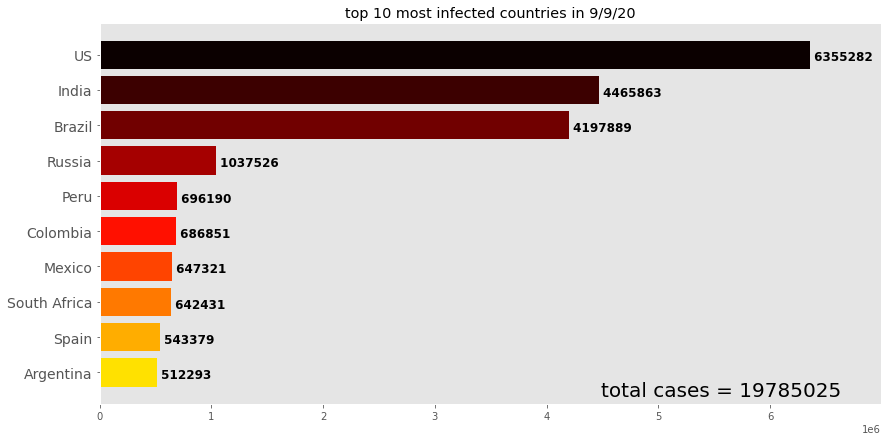

In [24]:
single_bar_chart(df='confirmed', date='9/9/20', n_shown_countries=10)

**example**

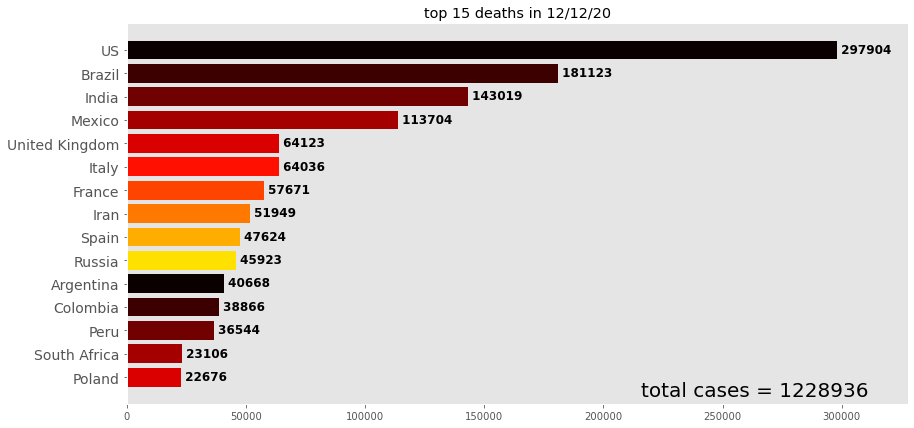

In [25]:
single_bar_chart(df='deaths', n_shown_countries=15)

**example**


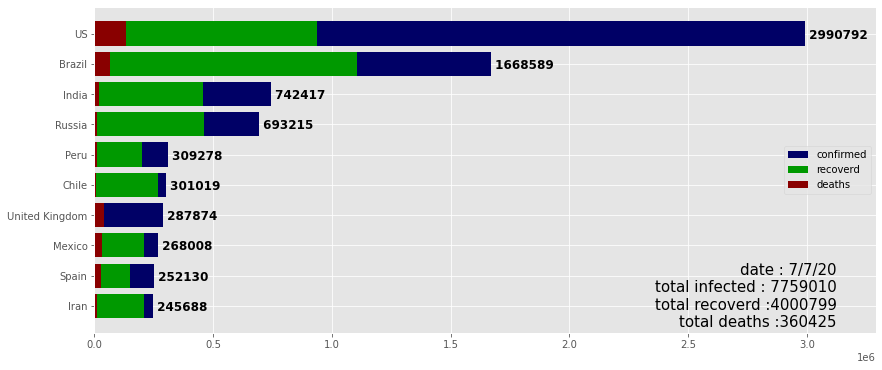

In [26]:
single_proportional_chart(date='7/7/20')

**example**

***note : each ranking of below chart has obtained by this method : ` total number of infected cases / population `***

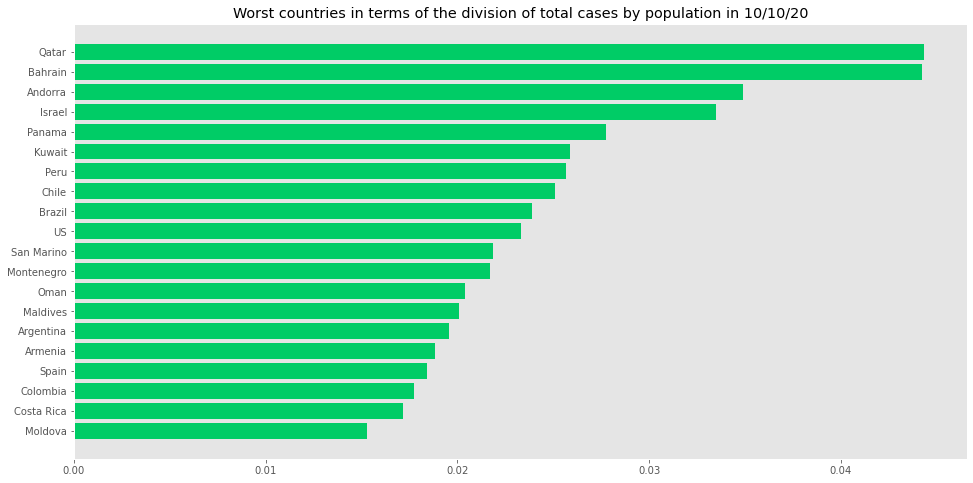

In [27]:
single_total_cases_to_population(date='10/10/20', n_shown_countries=20)

**example**


In [ ]:
animated_bar_chart(c_df, dpi=144, start_date='12/12/20',
                   title='top 10 countries with highest COVID-19 cases')

In [ ]:
animated_bar_chart(d_df, start_date='12/12/20', dpi=144,
                   title='top 10 countries with highest COVID-19 deaths')

***This chart is obtained by this method: Dividing the total number of patients by the population of the country for each day***

In [ ]:
animated_bar_chart(temp_df, start_date='12/12/20', label_bar=False, dpi=144,
                   title='worst countries in terms of devision of total cases to population')

## other charts

In [28]:
def total_counts(df, title=''):

    x = df.sum(axis=1).index
    y = df.sum(axis=1)

    fig1 = plt.figure(figsize=(14, 7))
    ax = fig1.add_subplot(111)
    ax.grid(False)
    ax.patch.set_facecolor('#404040')
    ax.ticklabel_format(style='plain')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_xlabel("date", size=16)
    ax.set_ylabel("count", size=16)
    subtitle_count = df.loc[convert_today_date()].sum()
    ax.text(3, subtitle_count - .2 * subtitle_count,
            f'total cases : {subtitle_count}', color='white', size=12)
    ax.annotate('tipping point', size=12, xy=('3/25/20', df.sum(axis=1).loc['3/25/20']+(int(.2 * df.sum(axis=1).loc['3/27/20']))), xytext=('4/4/20', df.sum(axis=1).loc['4/4/20']+(int(.2 * df.sum(axis=1).loc[convert_today_date()]))),
                color='white', arrowprops=dict(facecolor='white', shrink=1))

    plt.locator_params(nbins=4)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=12)
    plt.xlabel('date')
    plt.plot(df.sum(axis=1), color='red', lw=2.5)
    plt.title(title + f' (until {convert_today_date()}) ')
    plt.fill_between(x, y, alpha=.7)
    plt.show()

**example**


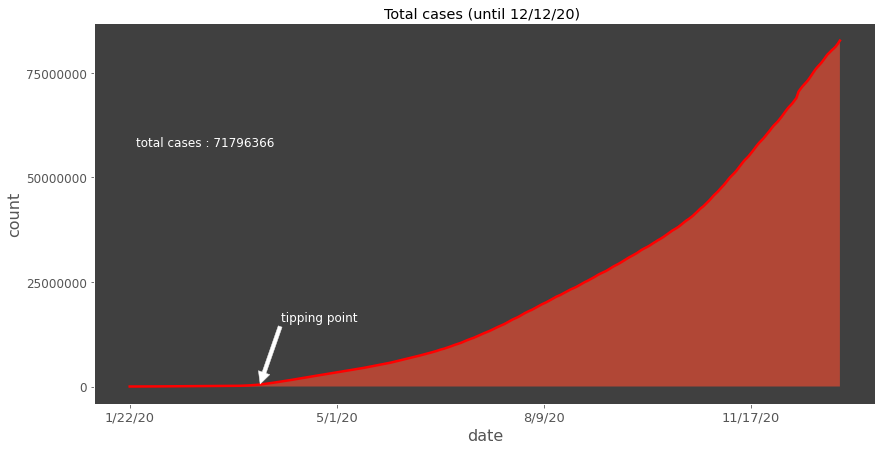

In [29]:
total_counts(c_df, title='Total cases')

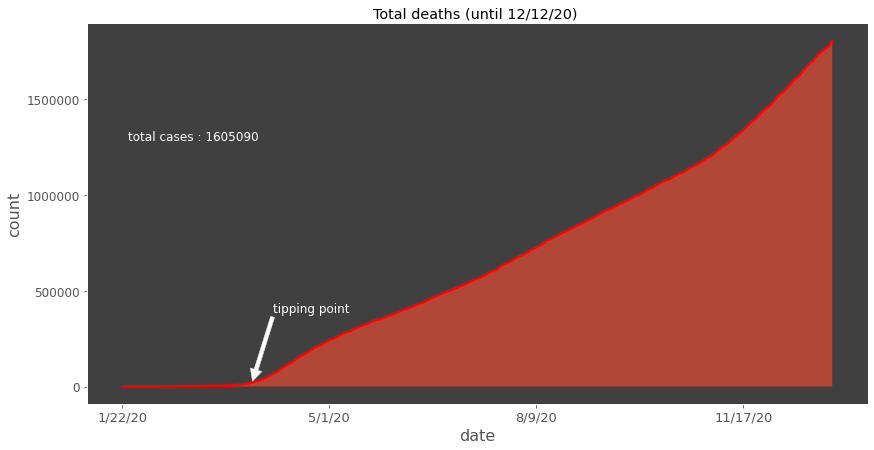

In [30]:
total_counts(d_df, title='Total deaths')

### line charts

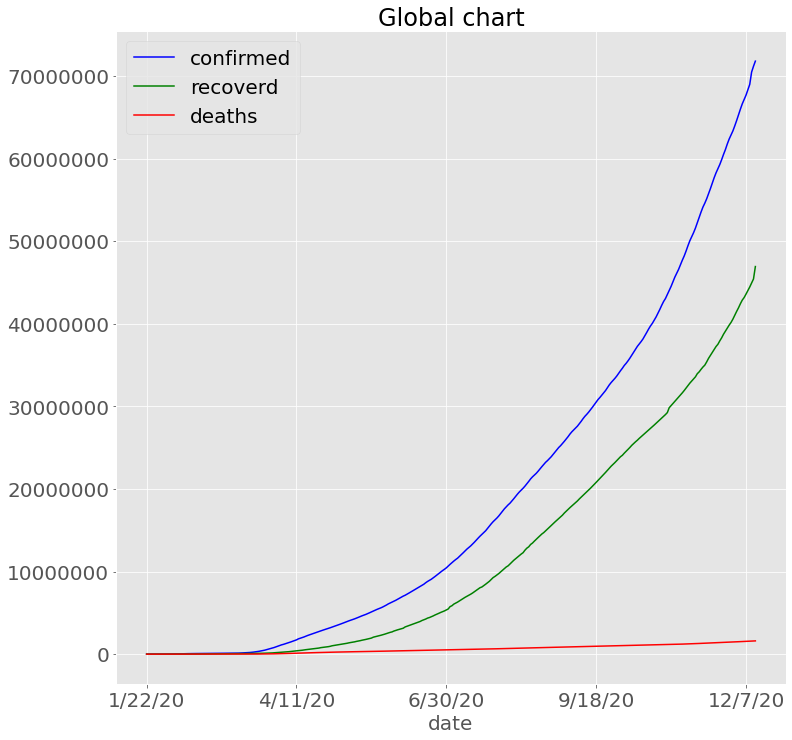

In [31]:
fig1 = plt.figure(figsize=(12, 12))
ax = fig1.add_subplot(111)

ax.ticklabel_format(style='plain')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.xlabel('date', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(c_df.loc[:'12/12/20'].sum(axis=1), color='blue')
plt.plot(r_df.loc[:'12/12/20'].sum(axis=1), color='green')
plt.plot(d_df.loc[:'12/12/20'].sum(axis=1), color='red')

plt.legend(['confirmed', 'recoverd', 'deaths'], prop={'size': 20})
plt.title('Global chart', size=24);

In [32]:
def country_chart(country='US', recoverd=True, deaths=True):
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    subtitle_count_c = c_df.loc[convert_today_date(), 'US'].sum()
    ax.ticklabel_format(style='plain')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ylim = int(ax.get_ylim()[1])

    plt.xlabel('date', size=20)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.plot(c_df.loc[:'12/12/20'][country], label='confirmed', color='blue')
    if recoverd:
        plt.plot(r_df.loc[:'12/12/20'][country], label='recoverd', color='green')
    if deaths:
        plt.plot(d_df.loc[:'12/12/20'][country], label='deaths', color='red')
    plt.legend(prop={'size': 20})
    plt.title(f'COVID-19 chart for {country}', size=22)
    plt.show()

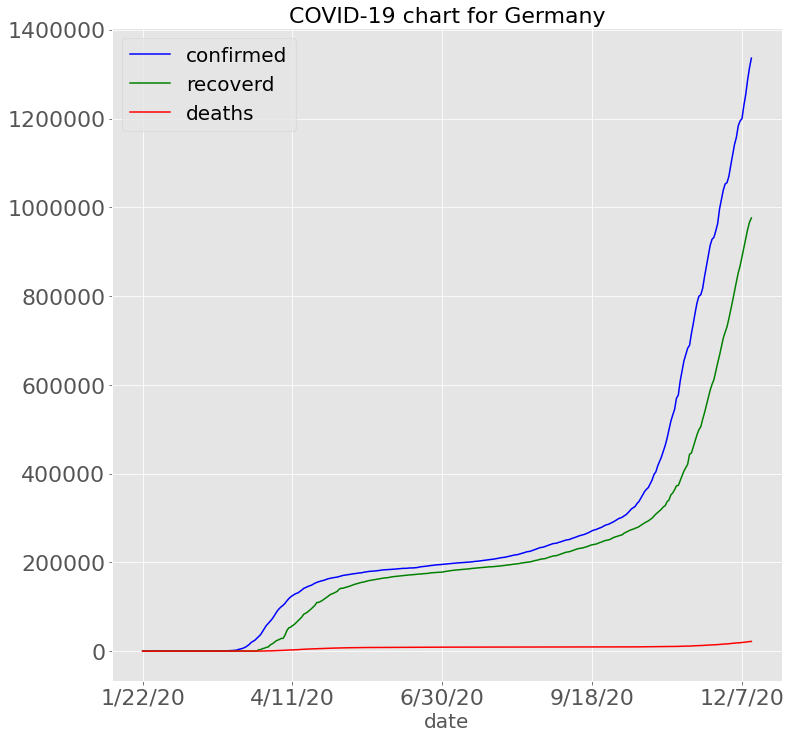

In [33]:
country_chart('Germany')

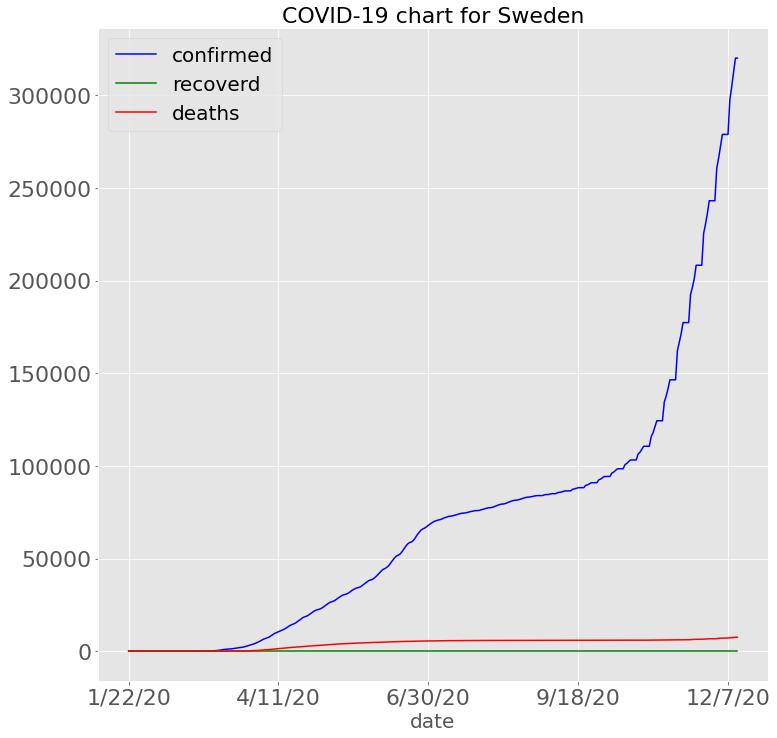

In [34]:
country_chart('Sweden')

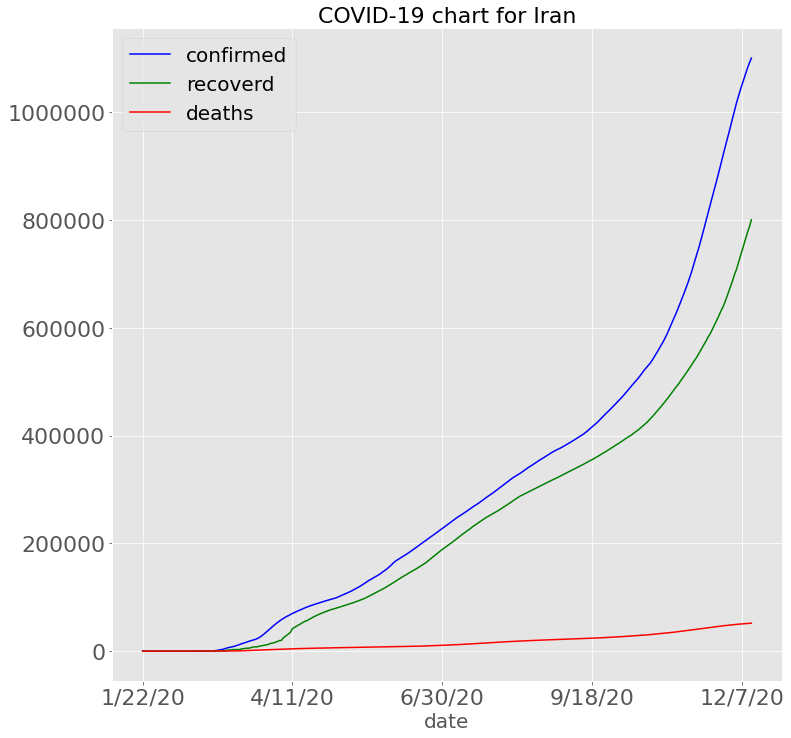

In [35]:
country_chart('Iran')

In [36]:
def new_cases_chart(df ,kind = 'bar', country = 'Iran' , n_results = 30 , title = None ):
    d = df.loc[:'12/13/20'].tail(n_results)[country]
    l = df.loc[:'12/13/20'].tail(n_results)[country].index.tolist()
    ll = []
            
    for day in l:
        try :
            ll.append(d.loc[l[l.index(day)+1]] - d.loc[l[l.index(day)]])
        except IndexError:
            break

    kwargs = {'alpha':1, 'linestyle':'-', 'linewidth':2, 'edgecolor':'k'}
    fig1 = plt.figure(figsize=(20,8))
    ax = plt.subplot(111)
    plt.title(f'distribution of {title} in {country} (last {n_results} days)', fontsize = 20);
    plt.xlabel('date', fontsize = 20);
    plt.xticks(rotation=45,fontsize=12)
    plt.yticks(fontsize=19)
    
    if kind =='bar':
        sns.barplot(x = l[:-1] , y = ll,saturation=.8,**kwargs);
        ax.xaxis.set_major_locator(plt.MaxNLocator(30))
    elif kind =='line':
        ax.grid(False)
        ax.xaxis.set_major_locator(plt.MaxNLocator(30))
        plt.plot(l[:-1],  ll , lw = 4 , color = 'r' );
        
    else:
        raise ValueError('invalid value for kind')

#### description of some effective parameters listed as below :


   - **new cases chart**
       > 1. ***`country`*** :
           *name of target country*
       > 1. ***`n_results`*** :
           *this parameter determines last days result. for example,
           {n_result = 30} will show the results for last 30 days.*

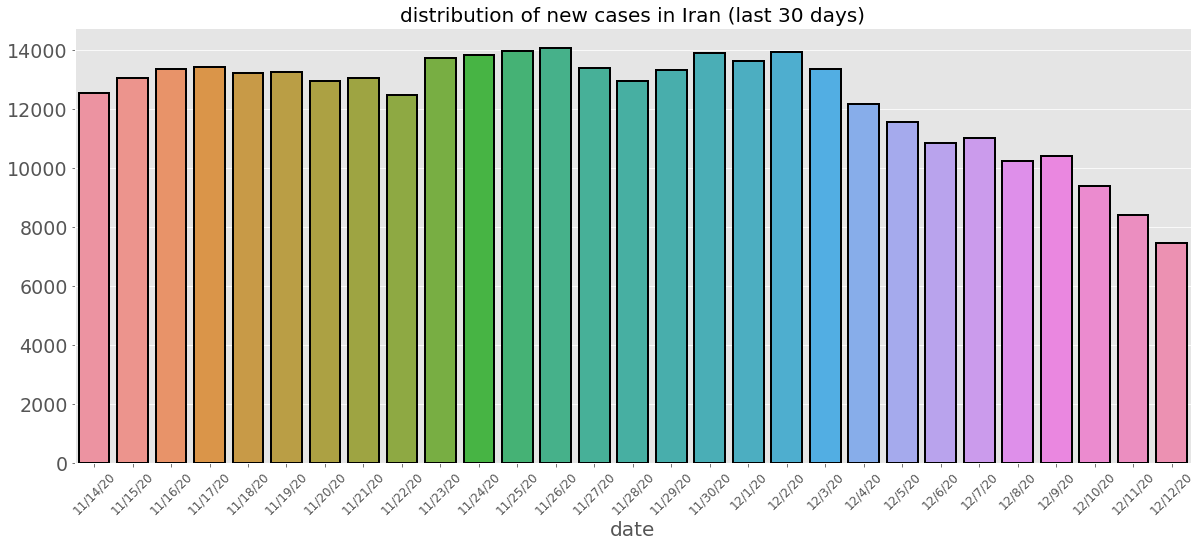

In [37]:
new_cases_chart(c_df ,country='Iran' , title = 'new cases',n_results=30)

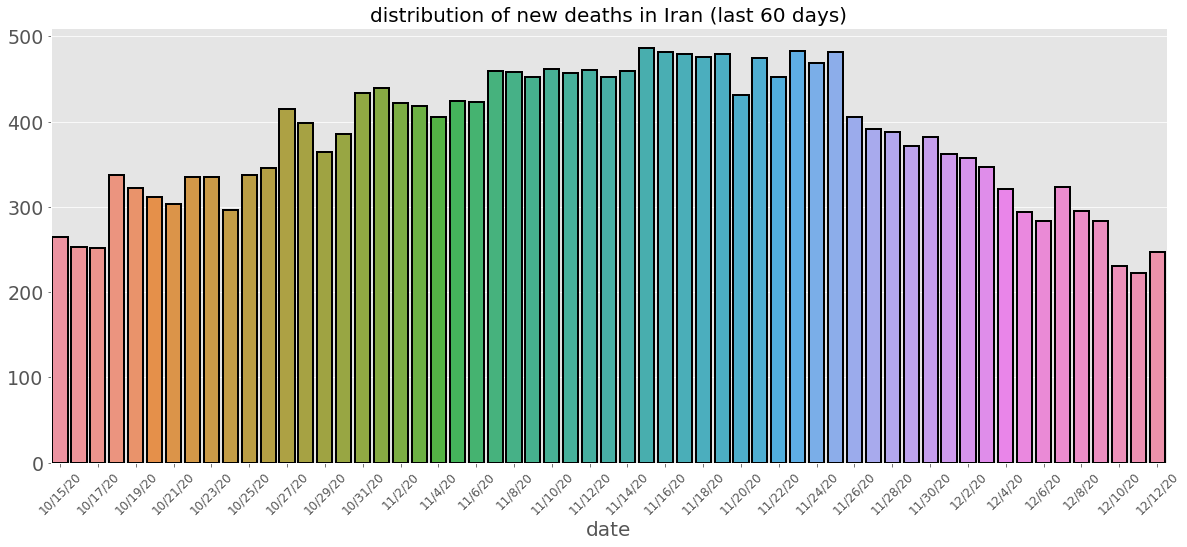

In [38]:
new_cases_chart(d_df,country='Iran',n_results=60,kind='bar',title='new deaths')

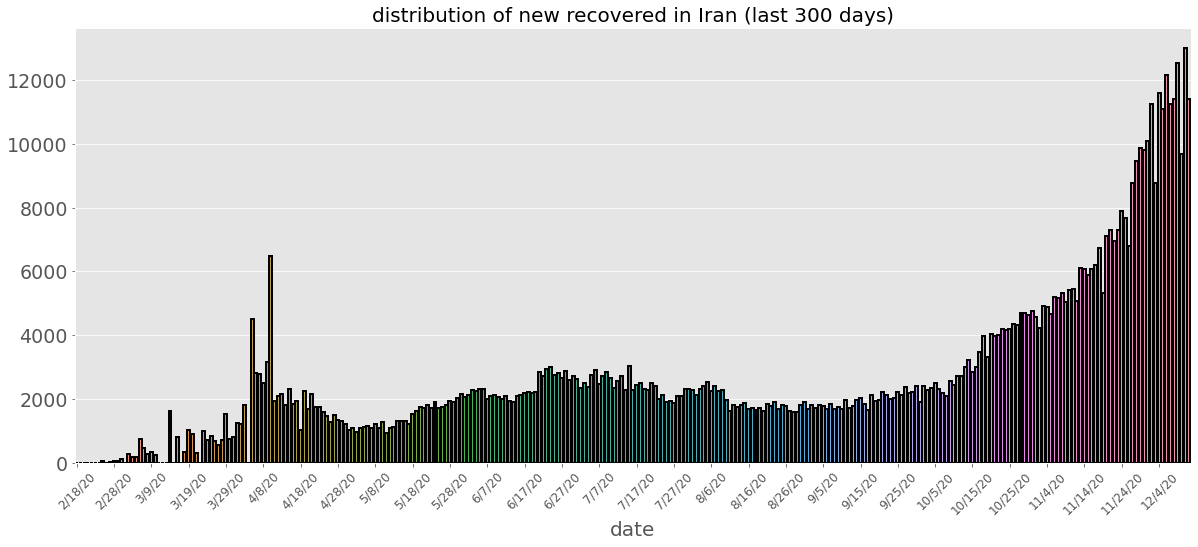

In [39]:
new_cases_chart(r_df,country='Iran',n_results=300,kind='bar',title='new recovered')

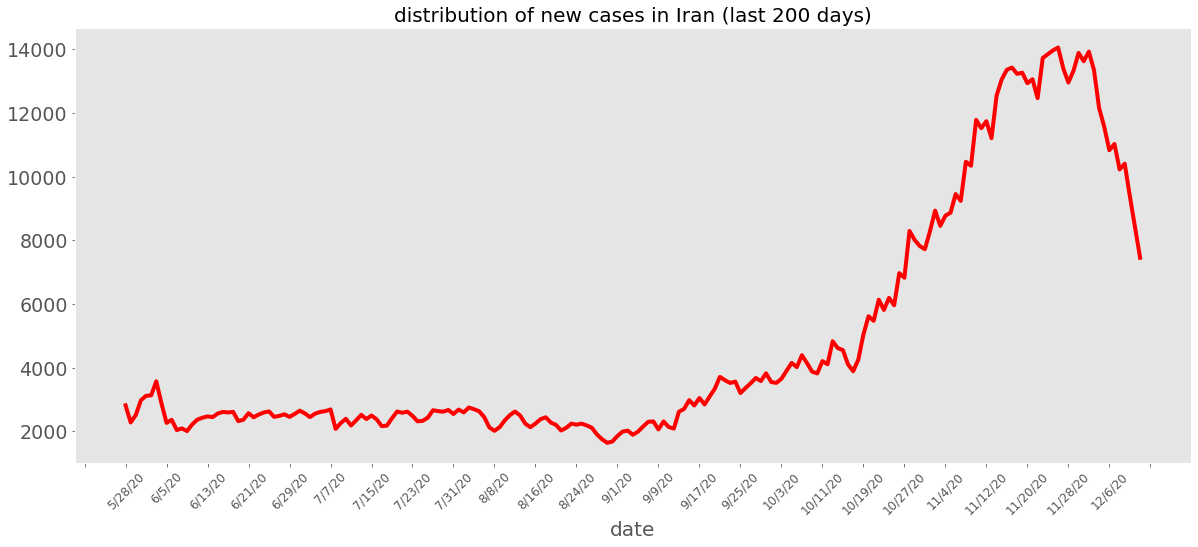

In [40]:
new_cases_chart(c_df,country='Iran',n_results=200,kind='line',title='new cases')

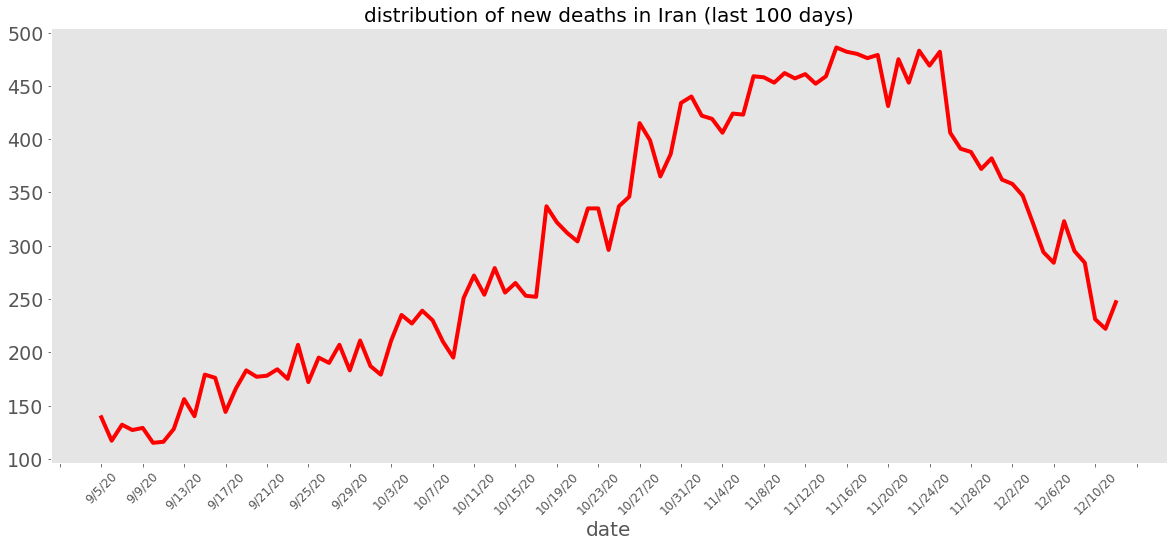

In [41]:
new_cases_chart(d_df,country='Iran',n_results=100,kind='line',title='new deaths')

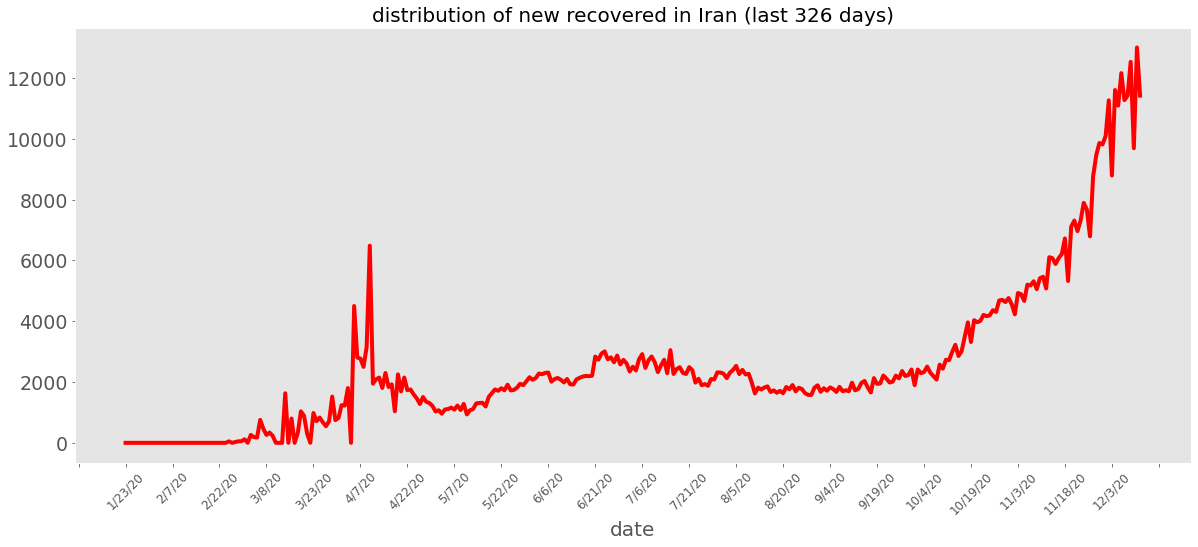

In [42]:
new_cases_chart(r_df,country='Iran',n_results=326,kind='line',title='new recovered')

### animated plot for daily cases

In [43]:
import matplotlib.animation as animation 

def animated_daily_case(df,kind = 'line', country = 'Iran',start_date = '1/22/20',stop_date = '12/12/20' ,save = False ,main_title = '',save_title = 'animated_plot'):

    d = df.loc[start_date:stop_date][country]

    fig1 = plt.figure(figsize=(22,10))
    ax = plt.subplot(111)
    ax.grid(False)
    plt.xlabel('date', fontsize = 20);
    plt.xticks(rotation=45,fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(f'{main_title} in {country} from {start_date} to {stop_date}',size=20)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))

    def animate(i):
        ll=[]
        data = d.iloc[:int(i+1)]
        l = data.index.tolist()
        for day in l:
            try :
                ll.append(d.loc[l[l.index(day)+1]] - d.loc[l[l.index(day)]])
            except IndexError:
                break
        temp = pd.Series(ll,index=l[:-1],dtype='float64')
        if kind == 'bar':
            a = plt.bar(l[:-1], temp,color="#660000", linestyle = '-' , linewidth=1.12 , edgecolor='k',width = .91);
            return a
        if kind =='line':
            a = sns.lineplot(x = l[:-1],y=temp,color = '#660000')
            b = plt.fill_between(l[:-1], temp, alpha=.9,color='#660000');
            return a,b
    anim = animation.FuncAnimation(
    fig1, animate ,interval=141,frames = len(d.index.tolist())+5)
    if save:
        anim.save(f'{save_title}')
    plt.show()

In [ ]:
animated_daily_case(d_df,kind='bar',start_date='2/2/20',stop_date='12/12/20',save=True,main_title='daily deaths')

THANKS!